In [ ]:
!pip install -r requirements.txt

In [ ]:
#!pip install -r requirements.txt --upgrade

# Neural Networks

Over the last 10 years, advances in computing power, statistical techniques and algorithmic ingenuity have brought an unprecedented level of accuracy in one particular type of Machine Learning model: the **Neural Network**. Neural networks now allow us to have an extremely high level of precision for all kinds of tasks such as:

- Speech Recognition (Siri, Alexa & Google Assistant)
- Speech Synthesis (Tacotron)
- Text parsing (BERT)
- Text Creation (GPT-3)
- Object Recognition (YOLO v4, Instagram/TikTok face filters)
- Image and Video Creation and Manipulation (PULSE, DeepFakes, StarGAN v2)
- All kinds of Classification and Regression (too many examples to count!)

These advances have not only been achieved extremely quickly and to an accelerating rate, but they have also reached the hands of everyday consumers in record time, changing the way the world works. Neural Networks are behind Tesla's self-driving cars, your phone's assistant, the recommendation system for Netflix, the Colombian Governments Tax Evaders check, the load balancing in the Electricity grid, the activation of an alarm system and many, many other parts of your everyday life. As the technology develops, the cons of using neural networks are ever-less important, while its pros shine more brightly than before. Soon, it's likely that almost every service in our life will be touched by a neural network in one way or another.

## But... what exactly is a Neural Network?

A neural network is a type of **Machine Learning Model**. This particular type of model derives its name from how we believe our own neurons work: as a series of simple components, that together can achieve amazing things.

### The Neuron

To understand a neural network, let's dissect it from the very beginning. First, we need to understand its smallest building block: the neuron. Remember back to the basics of statistics, we learnt how we can model the relationship between one dependent variable $y$ and a set of independent variables $X$. This relationship can be thought of as an equation like $y = f(X)$. The exact form of $f(x)$ is not important, all that matters is that we can estimate a value for $y$ given a set of $X$.

A neuron is exactly that! A function which receives a set of inputs and gives an output. The way the neuron does this happens in 2 steps:

1. The neuron takes all its inputs, multiplies each of them by a weight exclusive to that input, and adds all of the results together.
2. It takes the result of the first step and uses another function, called the _activation function_ of the neuron, to determine what $y$ will be.

While the first step is pretty standardized, there are a myriad of __activation functions__ in use today. The most popular one at the moment is the ReLU (short for Rectified Linear Unit), but there are many more. What most of them have in common is that they output a number between -1 and 1 or between 0 and 1. However, beyond that, there are many differences in these functions. Here is an incomplete list:

That is the short definition of what a neuron is! Just a simple function that takes inputs and outputs a single number. Now, you may be wondering where these inputs come from... That's where the _network_ part of a neural network comes in.

### The Network

The way neural networks work is by connecting several neurons in a row. You can imagine a neural network as an interconnected series of neurons. Usually, these neurons are arranged in sequential order in what are called __layers__, although not always. The first layer of a neural network is called the __input layer__, the final layer is called the __output layer__, and every layer in between is called a __hidden layer__. The reason they are called hidden will be apparent soon! Here is an example of a very simple neural network with 1 input layer, 1 hidden layer and 1 output layer:

Each of the above circles is a neuron that works like we explained before:
1. The neurons in the first layer use our original input $X$ as their set of inputs.
2. The neurons assign a weight to each of the inputs.
3. The weighted inputs are summed.
4. The _activation function_ is run on the sum.
5. The neurons output the result of the _activation function_.

Note how each neuron has an individual set of weights; every neuron "interprets" the set of inputs differently.

The second layer neurons, or the first _hidden layer_ neurons, as they are more commonly known, each take the results of the input layer (instead of $X$) and applies the above process again! In this example this happens only once, but you may have as many hidden layers as you want; some large models have thousands of hidden layers! The number of neurons in each layer is the __width__ of the network. Note that each layer may have a different width.

The third and final step is done by the output layer: it does the same process again using the output of the final hidden layer, except it uses special kinds of activation functions that allow it to give an output that fits our problem. For example, if we are doing regression, it may use a linear function in order to return a number larger than 1, and for classification it may use a sigmoid function in order to return a probability between 0 and 1. What's important is that the final layer gives us our result: given the set of inputs we gave the input layer, our output layer gives us a corresponding output that hopefully provides a good prediction for our particular problem.

Now, how do we know if our result was good or not? This question is deeper than it sounds, and its answer depends on if we are solving a supervised or unsupervised problem. However, we can generally apply a testing strategy used in other Machine Learning model: Run whatever performance metric we want on the result, and see how the model performs in comparison to our true labels (in case of a supervised problem), or how much of a fit to the data we have (for unsupervised problems).

#### Correcting course: Backpropagation

An important detail is that the initial weights used in the neural network were randomly chosen. The chances that a series of multiplications and sums, where half the factors were randomly determined, will end up in giving us a number close to what we expected or any kind of good performance is very, very low. Impossible, even. So, how does the network work out what the correct weights are to end up with a good performance?

The secret is __backpropagation__, or backprop for short. Remember how in calculus class you could find the gradient for a given function by finding its derivative, and you could find an optimal point by seeing where this gradient is zero? Well, backpropagation is something akin to that. In simplified terms, backpropagation is the process of finding the gradient for our neural network's __error functions__ (which is often the same as our performance metric, like RMSE or MAE) for each neuron's respective weight vector. As in calculus class, we go down the slope for each weight vector's gradient until we find a point where the slope is 0 or close to 0. Selecting these weights allows us to create the best performing network that minimize our errors.

This process is called Backpropagation because the process determines the errors after receiving the result from the output layer. Given any input and our current weights, we find an output, calculate its error, and use this error to send information _back_ in the network to each neuron, letting us find its gradient and adjust the weights.

Neural networks do this process over and over and over, each time adjusting the weights of each neuron a little so that the error gets lower and lower each time, until we get to a point where the error cannot be reduced any further. This process is called __training__. After we have _trained_ our neural network, we can expect to have a good predictor for our particular problem. Each cycle of learning is called an __epoch__.

This process has a fundamental problem: we don't know what each layer is doing. Its final value is obviously important to the final result, but given the large number of connections between each neuron and future weights, the interpretability of what each hidden layer does is almost 0. Hence why they are called _hidden_. The neural network is very much like a _black box_ as we see what's going in and what's coming out, but we don't see the transformation process.

If you want to read more on backpropagation, check out this [in-depth guide](https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd)

## Let's build one!

Now, let's put all this talk to practice. The Python library typically used to build a neural network is either Tensorflow or Pytorch. For this bootcamp, we will use Tensorflow in order to classify the Iris dataset, which is a dataset of flowers typically used in a classification problem. We have several flowers, each with different characteristics, and for each of them, we want to predict which of the 3 possible species of _Iris_ flower they are.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
# Anemia type prediction based on CBC data
# CBC (Complete Blood Count) is an essential comprehensive blood panel that
# allows your doctor to evaluate each type of cell in your blood.
#https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification?resource=download

df = pd.read_csv('diagnosed_cbc_data_v4.csv')
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


Data Dictionary:

*HGB: The amount of hemoglobin in the blood,
crucial for oxygen transport.
*PlT: The number of platelets in the blood, involved in blood clotting.
*WBC: The count of white blood cells, vital for immune response.
*RBC: The count of red blood cells, responsible for oxygen transport.
*MCV (Mean Corpuscular Volume): Average volume of a single red blood cell.
*MCH (Mean Corpuscular Hemoglobin): Average amount of hemoglobin per red blood cell.
*MCHC (Mean Corpuscular Hemoglobin Concentration): Average concentration of hemoglobin in red blood cells.
*PDW: a measurement of the variability in platelet size distribution in the blood
*PCT: A procalcitonin test can help your health care provider diagnose if you have sepsis from a bacterial infection or if you have a high risk of developing sepsis
*Diagnosis: Anemia type based on the CBC parameters

In [ ]:
# revisando cuantos valores hay por cada clase
counts = df["Diagnosis"].value_counts()
print (counts)

Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64


In [ ]:
df1 = df.copy()

# reemplazar la columna gender por números para el clasificador
df1["Diagnosis"] = df1["Diagnosis"].replace({"Healthy": 0,
                   "Normocytic hypochromic anemia": 1,
                   "Normocytic normochromic anemia": 2,
                   "Iron deficiency anemia": 3, "Thrombocytopenia": 4,
                   "Other microcytic anemia": 5, "Leukemia": 6,
                   "Macrocytic anemia": 7, "Leukemia with thrombocytopenia": 8})
df1.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,1
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,1
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,3
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,3
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,1


In [ ]:
# revisando cuantos valores hay por cada clase
counts = df1["Diagnosis"].value_counts()
print (counts)

Diagnosis
0    336
1    279
2    269
3    189
4     73
5     59
6     47
7     18
8     11
Name: count, dtype: int64


In [ ]:
#Any missing values?

df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [ ]:
#Checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [ ]:
#Any duplicate rows?
#df1 = df.copy() se comenta porque antes se hizo la copia

n_dup = len(df1) - len(df1.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

if n_dup > 0:
   # Eliminar filas duplicadas
   df = df1.drop_duplicates()
   n_dup = len(df1) - len(df1.drop_duplicates())
   print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 49
Number of duplicate rows: 49


In [ ]:
dataset = df1.values
dataset



array([[10.        , 43.2       , 50.1       , ..., 12.5       ,
         0.17      ,  1.        ],
       [10.        , 42.4       , 52.3       , ..., 12.5       ,
         0.16      ,  1.        ],
       [ 7.2       , 30.7       , 60.7       , ..., 14.3       ,
         0.14      ,  3.        ],
       ...,
       [ 9.2       , 25.845     , 77.511     , ..., 14.31251157,
         0.26028   ,  0.        ],
       [ 6.48      , 25.845     , 77.511     , ..., 14.31251157,
         0.26028   ,  0.        ],
       [ 8.8       , 25.845     , 77.511     , ..., 14.31251157,
         0.26028   ,  0.        ]])

In [ ]:
# Asignando todas las columnas excepto la última a X
X = dataset[:, :-1]

# Configurar la opción para mostrar números completos
np.set_printoptions(suppress=True)

# Imprimir el array sin notación científica
#print(X)
X


array([[ 10.        ,  43.2       ,  50.1       , ..., 189.        ,
         12.5       ,   0.17      ],
       [ 10.        ,  42.4       ,  52.3       , ..., 180.        ,
         12.5       ,   0.16      ],
       [  7.2       ,  30.7       ,  60.7       , ..., 148.        ,
         14.3       ,   0.14      ],
       ...,
       [  9.2       ,  25.845     ,  77.511     , ..., 329.        ,
         14.31251157,   0.26028   ],
       [  6.48      ,  25.845     ,  77.511     , ..., 174.        ,
         14.31251157,   0.26028   ],
       [  8.8       ,  25.845     ,  77.511     , ..., 279.        ,
         14.31251157,   0.26028   ]])

In [ ]:
# Obteniendo el número de filas
num_filas = len(X)

# Imprimiendo el número de filas
print(f"X tiene {num_filas} filas.")

X tiene 1281 filas.


In [ ]:
# Asignando la última columna a y
y = dataset[:, -1]
y

array([1., 1., 3., ..., 0., 0., 0.])

In [ ]:
min_value = np.min(y)
max_value = np.max(y)
print("Valor mínimo en y:", min_value)
print("Valor máximo en y:", max_value)

Valor mínimo en y: 0.0
Valor máximo en y: 8.0


In [ ]:
# Obteniendo el número de filas
num_filas = len(y)

# Imprimiendo el número de filas
print(f"y tiene {num_filas} filas.")

y tiene 1281 filas.


We then have 1281 rows, each of which represents a Anemia Types. Anemia Types has 14 features we can use for our prediction, and each Anemia Types belongs to 1 of 8 types, represented by the number 0 through 7. The task for our neural network is to train with this dataset and then predict the type of Anemia that the neural network has not seen before.


In [ ]:
# Let's get a train and test set. We'll use 20% of our database (30 flowers) as a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[  4.5       ,  25.8       ,  64.4       , ..., 128.        ,
         12.8       ,   0.12      ],
       [  7.4       ,  25.845     ,  77.511     , ..., 280.        ,
         13.6       ,   0.26028   ],
       [  7.2       ,  25.845     ,  77.511     , ..., 330.        ,
         25.        ,   0.26028   ],
       ...,
       [ 10.31      ,  25.845     ,  77.511     , ..., 179.        ,
         14.31251157,   0.26028   ],
       [  5.9       ,  25.845     ,  77.511     , ..., 200.        ,
         13.3       ,   0.26028   ],
       [  9.09      ,  25.845     ,  77.511     , ..., 230.        ,
         14.31251157,   0.26028   ]])

The first step when using Tensorflow is to initialize the model. The model we saw in previous examples is a "Sequential" model, so we will ask Tensorflow to initialize it without any layers at first.

In [ ]:
# First, we initialize the model.
model = tf.keras.models.Sequential()

Now, we will add our layers to this empty model. We will first add our input layer, then a couple of hidden layers, and finally our output layer. Notice how we chose to use ReLU functions as our activation function, but we could have just as well chosen one of many others. We choose 10 neurons as our width for no particular reason. Usually, a larger model gives better results, but needs more and more diverse data to work well.

In [ ]:
# First our input layer. For this layer, and this layer only, we need to specify the size of our input. For our dataset this means the amount of columns in our X.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(X.shape[1],)))
# Now some hidden layers
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
# Finally, our output layer. Since we have 9 possible types, we need 9 output neurons.
# For a regression problem, we would have only 1. For an image creation network, we would have as many pixels as the image we wanted to create!
model.add(tf.keras.layers.Dense(9))
# A final layer with several output neurons gives us logits as results. We can do a final pass with a Softmax layer to turn them into percentages.
model.add(tf.keras.layers.Softmax())

Now, we will decide on an _optimizer_. The optimizer is the algorithm which determines how much we move each weight down the slope we found by backpropagation. There are many possible choices, most of which are based on Stochastic Gradient Descent. [One of the most popular ones right now is "Adam"](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.), so that's the one we will use. The word "stochastic" means random process. That is why neural networks don't always get the same results even if you train them twice on exactly the same data with the same parameters. Making the process random makes it quicker, but less reliable. SGD and its child algorithms are a large part of the reason why training neural networks is now feasible.

The __learning rate__ is the amount of space we expect to move down the slope on each cycle of learning. The larger this number, the more we move, but the less precise the movement.

<table>
  <tr><td>
    <img src="media/optims.gif" width="70%"
         alt="Optimization algorithms visualized over time in 3D space.">
  </td></tr>
  <tr><td align="center">
   Optimization algorithms visualized over time in 3D space.<br/>(Source: <a href="http://cs231n.github.io/neural-networks-3/">Stanford class CS231n</a>, MIT License, Image credit: <a href="https://twitter.com/alecrad">Alec Radford</a>)
  </td></tr>
</table>

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)

Finally, we compile our final model and train with our data. Notice how we need to define a loss function, but we can also calculate other additional metrics to keep tabs on how our model is doing. The reason we can't use accuracy as our loss function is because the loss function _must_ be differentiable in order for backpropagation to work.

We also define a batch size: This is the amount of example we feed into our model at a time. You usually want this to be a power of 2, due to the way GPUs process data. 32 is a good starting point.

In [ ]:
print(y_train)
min_value = np.min(y_train)
max_value = np.max(y_train)
print("Valor mínimo en y_train:", min_value)
print("Valor máximo en y_train:", max_value)

[1. 2. 0. ... 2. 5. 1.]
Valor mínimo en y_train: 0.0
Valor máximo en y_train: 8.0


In [ ]:
# Verificar valores únicos
unique_labels = np.unique(y_train)
print("Valores únicos en y_train:", unique_labels)

# Verificar rango
min_value = np.min(y_train)
max_value = np.max(y_train)
print("Valor mínimo en y_train:", min_value)
print("Valor máximo en y_train:", max_value)

Valores únicos en y_train: [0. 1. 2. 3. 4. 5. 6. 7. 8.]
Valor mínimo en y_train: 0.0
Valor máximo en y_train: 8.0


In [ ]:
# Ajustar valores negativos a un valor válido (por ejemplo, 0)
#y_train_adjusted = np.where(y_train < 0, 0, y_train)

# Verificar valores únicos
#unique_labels = np.unique(y_train_adjusted)
#print("Valores únicos en y_train ajustado:", unique_labels)

# Verificar rango
#min_value = np.min(y_train_adjusted)
#max_value = np.max(y_train_adjusted)
#print("Valor mínimo en y_train ajustado:", min_value)
#print("Valor máximo en y_train ajustado:", max_value)

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=optim,metrics=['accuracy'])
history = model.fit(X_train, y_train,
        validation_data=(X_test, y_test),
        epochs = 20,
        batch_size=32)

Epoch 1/20
32/32 [==============================] - 2s 20ms/step - loss: 3.4102 - accuracy: 0.2754 - val_loss: 1.8525 - val_accuracy: 0.3230
Epoch 2/20
32/32 [==============================] - 0s 7ms/step - loss: 1.8238 - accuracy: 0.2861 - val_loss: 1.7318 - val_accuracy: 0.3268
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 1.7918 - accuracy: 0.2715 - val_loss: 1.7887 - val_accuracy: 0.3346
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 1.7401 - accuracy: 0.2588 - val_loss: 1.6675 - val_accuracy: 0.3230
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 1.7151 - accuracy: 0.2793 - val_loss: 1.6262 - val_accuracy: 0.3230
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 1.6831 - accuracy: 0.3174 - val_loss: 1.6263 - val_accuracy: 0.3346
Epoch 7/20
32/32 [==============================] - 0s 7ms/step - loss: 1.6764 - accuracy: 0.3027 - val_loss: 1.5962 - val_accuracy: 0.3774
Epoch 8/20
32/32 [=

Our model is now trained! We can see both the performance it had vs the data it was training on (`loss` and `accuracy`), and its performance vs the test data as it trained (`val_loss` and `val_accuracy`). This history an be easily saved since the `.fit()` method returns the results for each epoch.

In [ ]:
history.history

{'loss': [3.410163164138794,
  1.8237578868865967,
  1.7917546033859253,
  1.740106463432312,
  1.7150630950927734,
  1.683099389076233,
  1.676379919052124,
  1.6657969951629639,
  1.66193425655365,
  1.6729997396469116,
  1.6625584363937378,
  1.6463676691055298,
  1.656233787536621,
  1.6516093015670776,
  1.6452187299728394,
  1.6524198055267334,
  1.6521981954574585,
  1.6333210468292236,
  1.6379376649856567,
  1.6350016593933105],
 'accuracy': [0.275390625,
  0.2861328125,
  0.271484375,
  0.2587890625,
  0.279296875,
  0.3173828125,
  0.302734375,
  0.3232421875,
  0.3154296875,
  0.3388671875,
  0.3154296875,
  0.3720703125,
  0.333984375,
  0.3447265625,
  0.3408203125,
  0.3330078125,
  0.353515625,
  0.3427734375,
  0.353515625,
  0.345703125],
 'val_loss': [1.8525012731552124,
  1.7318108081817627,
  1.7886862754821777,
  1.6674803495407104,
  1.6262259483337402,
  1.626284122467041,
  1.5961614847183228,
  1.5974839925765991,
  1.5862820148468018,
  1.585204005241394,
  1

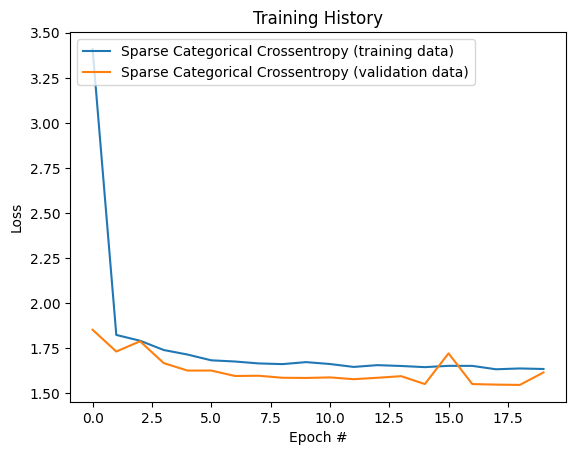

In [ ]:
# Plot history
plt.plot(history.history['loss'], label='Sparse Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Sparse Categorical Crossentropy (validation data)')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()

Finally, we can use our model to make predictions! This is as easy as calling the `.predict()` method, with a list of examples to get a prediction out of.

In [ ]:
# Let's get the prediction for the first flower in the test set
model.predict(X_test[:1])

1/1 [==============================] - 0s 315ms/step


array([[0.07927441, 0.3229272 , 0.17455372, 0.18065947, 0.08289105,
        0.07207599, 0.04842412, 0.03145576, 0.00773821]], dtype=float32)

Since we used a Softmax function in our model, the predictions return a list of probabilities which add up to one. Each probability corresponds to how confident our model is that the flower corresponds to a particular species. We can grab the highest of these predictions as our actual species, and compare it to the real one:

In [ ]:
predictions = model.predict(X_test)
for idx, prediction in enumerate(predictions):
    print('We predict: '+str(np.argmax(prediction))+'. Real Types was: '+str(y_test[idx]))

9/9 [==============================] - 0s 2ms/step
We predict: 1. Real Types was: 2.0
We predict: 0. Real Types was: 0.0
We predict: 4. Real Types was: 2.0
We predict: 1. Real Types was: 5.0
We predict: 2. Real Types was: 2.0
We predict: 1. Real Types was: 0.0
We predict: 1. Real Types was: 3.0
We predict: 4. Real Types was: 2.0
We predict: 1. Real Types was: 1.0
We predict: 1. Real Types was: 1.0
We predict: 1. Real Types was: 0.0
We predict: 2. Real Types was: 6.0
We predict: 4. Real Types was: 8.0
We predict: 1. Real Types was: 0.0
We predict: 0. Real Types was: 1.0
We predict: 2. Real Types was: 1.0
We predict: 1. Real Types was: 3.0
We predict: 4. Real Types was: 3.0
We predict: 0. Real Types was: 0.0
We predict: 2. Real Types was: 0.0
We predict: 4. Real Types was: 2.0
We predict: 0. Real Types was: 0.0
We predict: 0. Real Types was: 0.0
We predict: 4. Real Types was: 4.0
We predict: 1. Real Types was: 2.0
We predict: 2. Real Types was: 0.0
We predict: 1. Real Types was: 5.0
We p

9/9 [==============================] - 0s 2ms/step
Matriz de confusión (sklearn):
[[42 20 18  0  1  0  0  0  0]
 [ 4 35 10  0  7  0  0  0  0]
 [ 3 10 24  0  9  0  0  0  0]
 [ 1 19  9  0  5  0  0  0  0]
 [ 0  2  0  0 15  0  0  0  0]
 [ 0 13  1  0  0  0  0  0  0]
 [ 0  1  4  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  2  0  0  0  0]]
Clases únicas en y_test: [0. 1. 2. 3. 4. 5. 6. 7. 8.]
Clases únicas en y_pred: [0 1 2 4]
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.52      0.64        81
         1.0       0.35      0.62      0.45        56
         2.0       0.36      0.52      0.42        46
         3.0       0.00      0.00      0.00        34
         4.0       0.38      0.88      0.54        17
         5.0       0.00      0.00      0.00        14
         6.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


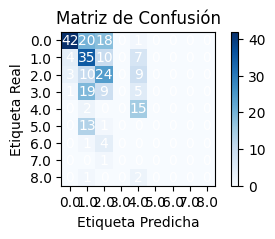


Cálculo utilizando librerias
TP: 35
TN: 42
FP: 20
FN: 4
Precisión (sklearn): 0.45136186770428016
Sensibilidad (sklearn): 0.45136186770428016
Especificidad (sklearn): 0.6774193548387096


In [ ]:
# Matriz de confusión utilizando librerias
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Obtener matriz de confusión utilizando sklearn
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión para inspección
print("Matriz de confusión (sklearn):")
print(conf_matrix)

# Imprimir las clases únicas presentes en y_test
print("Clases únicas en y_test:", np.unique(y_test))

# Imprimir las clases únicas presentes en y_pred
print("Clases únicas en y_pred:", np.unique(y_pred))

# Calcular métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
for i in range(len(np.unique(y_test))):
    for j in range(len(np.unique(y_test))):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white")
plt.show()

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print()
print("Cálculo utilizando librerias")
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

# Calcular precisión, sensibilidad y especificidad utilizando sklearn
precision_sklearn = precision_score(y_test, y_pred, average='micro')
sensibilidad_sklearn = recall_score(y_test, y_pred, average='micro')  # Recall es lo mismo que sensibilidad
# Calcular especificidad utilizando sklearn
especificidad_sklearn = TN / (TN + FP) if (TN + FP) > 0 else 0

print("Precisión (sklearn):", precision_sklearn)
print("Sensibilidad (sklearn):", sensibilidad_sklearn)
print("Especificidad (sklearn):", especificidad_sklearn)

Clases encontradas: [0. 1. 2. 3. 4. 5. 6. 7. 8.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC Score:  0.9404429414228718


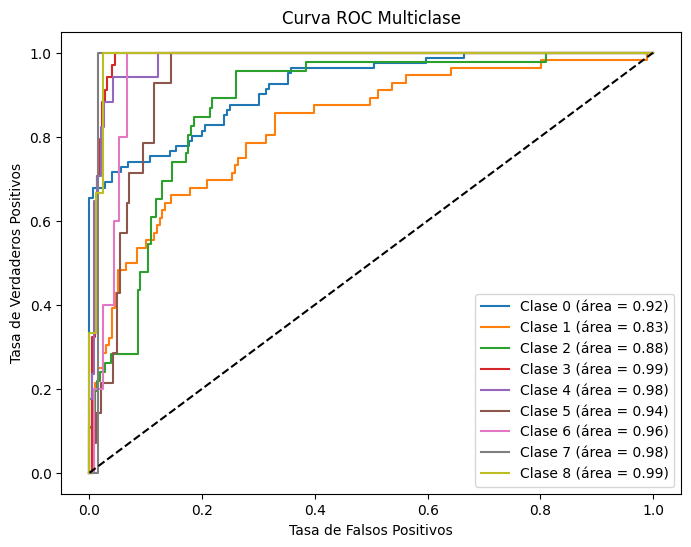

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Verificar las clases presentes en los datos de entrenamiento y prueba
classes = np.unique(y_train)
print("Clases encontradas:", classes)

# Binarizar las etiquetas
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Entrenar el modelo
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones
y_scores = model.predict_proba(X_test)

# Calcular el ROC AUC score para multiclase
roc_auc = roc_auc_score(y_test_bin, y_scores, multi_class='ovr')
print("ROC AUC Score: ", roc_auc)

# Dibujar la curva ROC para cada clase
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'Clase {i} (área = {roc_auc_score(y_test_bin[:, i], y_scores[:, i]):.2f})')

# Dibujar la línea diagonal (clasificación aleatoria)
plt.plot([0, 1], [0, 1], 'k--')

# Configurar el gráfico
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")
plt.show()


We have now built a simple neural network from scratch!


## Pros and Cons

Neural networks are amazing, but they are not perfect. As with everything in Data Science, they have good things and bad things about them. It's tempting to use a neural network for everything you see as they can actually solve almost any problem you throw at them. But it is important not to give into this tunnel vision and first explore alternatives before using a neural network.

The mains Cons of neural networks are:

1. **Computationally expensive**: Neural networks are _very_ computationally expensive to train when compared with other machine learning models. Training NNs efficiently today is only possible because of the combination of backpropagation with the advent of modern GPUs (graphic cards), which are processors that are extremely good at solving the kind of computations that backpropagation requires. This means that you NEED a GPU to train a Neural Network efficiently, and they are not cheap. Even with a GPU in hand, training a Neural Network typically takes longer than training other machine learning models, and with large models, this time constraint becomes very real (it could take months to train a single version of your network).
2. **Interpretability**: Neural networks are, by definition, complex. The fact that hidden layers are _hidden_ makes interpretability of the neural network very hard. It's basically impossible to find out why a neural network is giving us the results it is after its been trained, even though the results may be great. This may be irksome to those using the network: why is it telling me this cat is a dog? This and other such questions (but this question above all others) are the bane of Neural Network developers and users since their invention.
3. **Reliability**: Even though we may be getting amazing results 99.999% of the time, there may come a time when the network decides that it should turn your car right instead of left out of the blue, even if its just 1 time out of a million, just because we gave it the _exact_ wrong set of inputs. And when it does, we won't truly know why it behaved that way since it is not interpretable. This is a huge problem that forces neural networks in charge of sensitive systems to undergo additional checks. Other machine learning models are much more or even 100% reliable.
4. **Finicky**: The lack of interpretability of neural networks also causes a large problem when developing one. The process of finding the optimal number of neurons and layers to use, selecting an activation function, what set of features to feed it, and any of the other _hyperparameters_ needed to configure it is little more than educated trial and error. There is currently no mathematical formula to calculate any of these parameters, and the best method is using a random search over a set of possible values for each parameter, try out that combination, and see if it was better than the previous random combination. This means that _a lot_ of time is spent finding the perfect combination for your data.

Now the pros:

1. **Flexible**: Neural networks are _extremely_ flexible. Nowadays they can be used to solve mostly any problem you can think of. This doesn't mean they are _better_ than other models for the same problem, but there is no other Machine Learning model that can be used to solve such a diverse set of problems.
2. **High Dimensionality**: Neural networks excel at problems with high dimensionality. That is, problems where we use a very large number of inputs in order to get an output. This is why Neural Networks are so useful for computer vision and voice recognition problems, as there is an extremely large number of variables to be considered in order to make a decision. This can be taken to extreme levels: the GPT-3 language model has over 15 billion parameters.
3. **Speed**: Neural networks, once trained, are actually quite efficient to use. This means that neural network models can be used for processes that require large quantities of predictions in small amounts of time.
4. **Scalable**: Neural networks have shown that they are limited only by 2 factors: computation power and quantity of data. In general, a neural network will increase its performance as long as you either feed it more data or increase the depth and width of your model. Other optimization can help but is less potent. Competing machine learning models don't necessarily scale past a certain point, no matter how much computational power or data you throw at it.

<p>
    <img src="media/deepLearning.png" alt="Fun Stuff" width='400px'/>
</p>

Given these sets of pros and cons, the general recommendation is to _not_ use a neural network as your first model of choice, no matter how tempting. First, use other simpler models, and see their results. If they are good enough, there is no need to waste the time needed to train and optimize a neural network. But if you see that more traditional models are not cutting it, by all means unleash the power of the neural network on your data. It's very likely that with the right optimizations, enough data, and a ton of computing power, you will end up with a very capable model.